In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 

In [46]:
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [47]:
# We have 60,000 Image samples for our training data & 10,000 for our test data
# each 28 x 28 pixels, as they are grayscale, there is no 3rd dimension to our image
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print("shape of image",x_train[0].shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
shape of image (28, 28)


In [48]:
# type of data
type(x_train)

numpy.ndarray

In [49]:
# visualization
import matplotlib.pyplot as plt
import cv2 
import numpy as np

def imshow(tittle='',image=None,size=5):
    if image.any():
        height,width = image.shape[:2]
        aspect_ratio = width/height
        plt.figure(figsize=(aspect_ratio*size,size))
        plt.title(tittle)
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("image not found")    

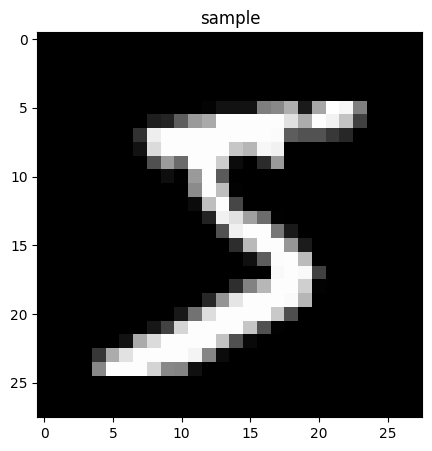

In [50]:
imshow('sample',x_train[0])

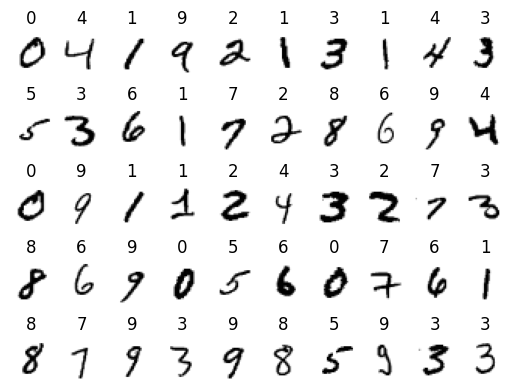

In [51]:
# use matplot to plot the image
numbers = 50

for i in range(1,numbers+1):
    plt.subplot(5,10,i).set_title(y_train[i])
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.axis('off')

# Preprocessing our dataset

Before passing our data to our CNN for training, we need to prepare it firstly. This entials:
1. Reshaping our data by adding a 4th Dimension
2. Changing our datatype from uint8 to float32
3. Normalizing our data to values between 0 and 1
4. One hot encoding to label

In [52]:
# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

# change our image type to float32 data type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train/=255
x_test/=255

print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [53]:
# one-hot encoding: convert the labels into a set of 10 numbers to input into the neural network
# eg: 2 -> [0,0,1,0,0,0,0,0,0,0]
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


Building Model

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

In [55]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

Training our Model
- Our preprocessed data is used as the input
- We set the batch size to 128 (or any number ranging from 8 to 256 is good)
- We set the number of epochs to 2, this is just for this tutorial purpose, but a value for at least 10 should be used
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's final performance. Here we are examing Test Loss and Test Accuracy

In [56]:
batch_size=32
epochs=5
history=model.fit(x_train,y_train,
                  batch_size=batch_size,
                  epochs=epochs,verbose=1,
                  validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3900 - accuracy: 0.8884 - val_loss: 0.1857 - val_accuracy: 0.9420
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1542 - accuracy: 0.9535 - val_loss: 0.1247 - val_accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1143 - accuracy: 0.9655 - val_loss: 0.0898 - val_accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0918 - accuracy: 0.9716 - val_loss: 0.0811 - val_accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.0875 - val_accuracy: 0.9733
Test loss: 0.08750179409980774
Test accuracy: 0.9732999801635742


In [57]:
history_dict=history.history
print(history_dict.keys())
print(history_dict)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
{'loss': [0.38996875286102295, 0.15421421825885773, 0.11429491639137268, 0.09183456003665924, 0.07784435898065567], 'accuracy': [0.8884166479110718, 0.9534666538238525, 0.965499997138977, 0.9716166853904724, 0.9764999747276306], 'val_loss': [0.1857062429189682, 0.12468228489160538, 0.08978589624166489, 0.08106499910354614, 0.08750179409980774], 'val_accuracy': [0.9419999718666077, 0.9606000185012817, 0.9718999862670898, 0.9736999869346619, 0.9732999801635742]}


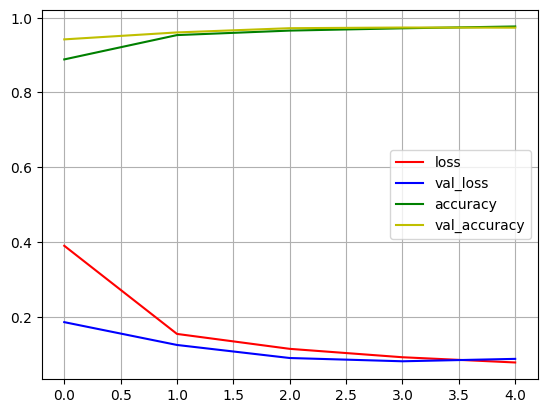

In [58]:
plt.plot(history.history['loss'],c='r',label='loss')
plt.plot(history.history['val_loss'],c='b',label='val_loss')
plt.plot(history.history['accuracy'],c='g',label='accuracy')
plt.plot(history.history['val_accuracy'],c='y',label='val_accuracy')
plt.grid(True)
plt.legend()
plt.show()

saving our model

In [59]:
model.save('mnist.h5')

c:\Users\saran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


load model

In [60]:
from tensorflow.keras.models import load_model

model=load_model('mnist.h5')

In [61]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
# make prediction
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 2s 6ms/step


array([[2.9265482e-07, 1.6362732e-08, 2.9905972e-05, ..., 9.9973816e-01,
        9.6682857e-07, 1.4294872e-05],
       [2.1189690e-06, 2.7241671e-04, 9.9943942e-01, ..., 2.4681782e-12,
        1.6895836e-05, 4.0234435e-10],
       [8.2023062e-06, 9.9610484e-01, 4.6366974e-04, ..., 7.4899336e-04,
        1.9451666e-03, 3.0209139e-05],
       ...,
       [2.5900033e-09, 1.2313319e-09, 5.1531918e-10, ..., 6.2354678e-07,
        9.4784300e-05, 2.8922854e-05],
       [4.6559074e-07, 6.4083743e-08, 1.1521134e-09, ..., 4.8292637e-09,
        7.3548459e-04, 2.5502562e-09],
       [1.3242480e-06, 1.8729012e-09, 6.7496781e-05, ..., 2.8385405e-10,
        2.0103926e-06, 2.7809784e-07]], dtype=float32)

In [63]:
np.argmax(y_pred,axis=1) # argmax return the index of the max value

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [64]:
# create confusion metrix
from sklearn.metrics import confusion_matrix

metrix=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

print(metrix)

[[ 951    0    0    0    2    9    7    1    6    4]
 [   0 1124    1    0    0    2    2    0    6    0]
 [   1    2 1012    3    1    0    1    5    7    0]
 [   0    0    2  948    1   44    0    2   10    3]
 [   0    1    4    0  973    0    1    0    2    1]
 [   2    0    0    0    1  886    1    0    2    0]
 [   1    3    0    1    7   10  930    0    6    0]
 [   0    6    9    1    5    0    0  988   11    8]
 [   0    0    2    4    4    7    1    2  953    1]
 [   1    4    0    1   16    7    0    3    9  968]]


In [65]:
class_accuracy = metrix.diagonal()*100 / metrix.sum(axis=1)

for i in range(len(class_accuracy)):
    print("Accuracy of class",i,"is",class_accuracy[i])


Accuracy of class 0 is 97.04081632653062
Accuracy of class 1 is 99.03083700440529
Accuracy of class 2 is 98.06201550387597
Accuracy of class 3 is 93.86138613861387
Accuracy of class 4 is 99.08350305498982
Accuracy of class 5 is 99.32735426008969
Accuracy of class 6 is 97.07724425887265
Accuracy of class 7 is 96.10894941634241
Accuracy of class 8 is 97.84394250513347
Accuracy of class 9 is 95.93657086223985


In [66]:
# classification report
from sklearn.metrics import classification_report
report=classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.94      0.96      1010
           4       0.96      0.99      0.98       982
           5       0.92      0.99      0.95       892
           6       0.99      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.94      0.98      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000





### High recall (or sensitivity) with low precision.
This tells us that most of the positive examples are correctly recognized (low False Negatives) but there are a lot of false positives i.e. other classes being predicted as our class in question. 

### Low recall (or sensitivity) with high precision.

Our classifier is missing a lot of positive examples (high FN) but those we predaict as positive are indeed positive (low False Positives)


### **CNN on the Fashion-MNIST Dataset usng NO Regularisation Methods**

In [67]:
from tensorflow.keras.datasets import fashion_mnist
# load data
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [68]:
# Our Class Names, when loading data from .datasets() our classes are integers
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [69]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


<Figure size 640x480 with 0 Axes>

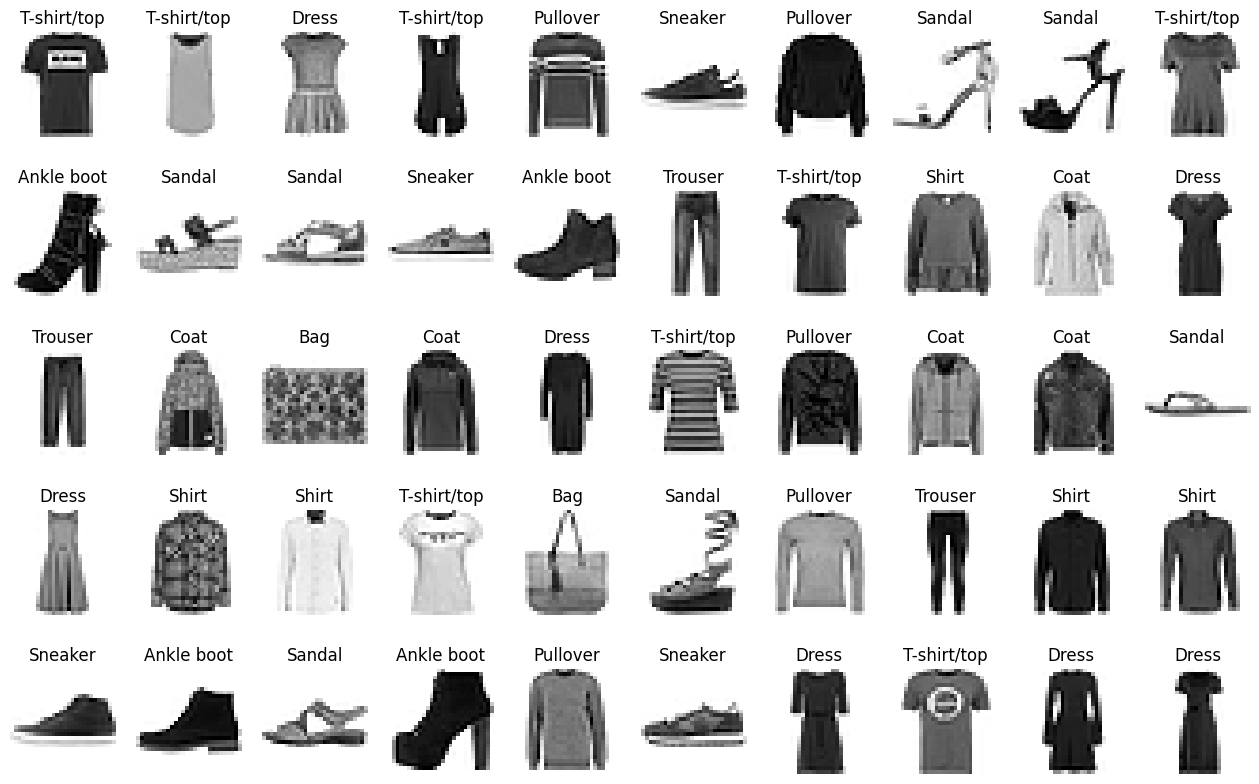

In [70]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

# Create figure and change size
figure = plt.figure()
plt.figure(figsize=(16,10))

# Set how many images we wish to see
num_of_images = 50 

# iterate index from 1 to 51
for index in range(1, num_of_images + 1):
    class_names = classes[y_train[index]]
    plt.subplot(5, 10, index).set_title(f'{class_names}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

In [71]:
# prepare data
# reshape
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
# change type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
# normalize
x_train/=255
x_test/=255
# one-hot encoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [72]:
x_train.shape

(60000, 28, 28, 1)

In [73]:
# create model
model = Sequential()

# Add our layers using model.add()

# We create a Conv2D layer with our specifications 
# Here we are using 32 filters, of size 3x3 with ReLU activation
# Our input shape is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=x_train.shape[1:]))
# We add a second Conv layer with 64 filters, 3x3 and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# We use a standard MaxPool of 2x2 and a stride of 2 (by default Kera's use the same stride as the window size)
model.add(MaxPooling2D(pool_size=(2, 2)))
# We now flatten our previous layers' output which is 12 x 12 * 64 * 1 = 9216
model.add(Flatten())
# We now connect this flattened later to 128 Nodes of our Fully Connected or Dense Layer, again using ReLU
model.add(Dense(128, activation='relu'))
# We now create our last Fully Connected/Dense layer consisting of 10 nodes which correspond to our output classes
# This is then used with a 'softmax' activation to give us our final class probabilities
model.add(Dense(len(classes), activation='softmax'))

In [74]:
# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.001)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001, momentum=0.9),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [75]:
# train model
batch_size=32
epochs=5
history=model.fit(x_train,y_train,
                  batch_size=batch_size,
                  epochs=epochs,verbose=1,
                  validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.6911 - accuracy: 0.7525 - val_loss: 0.5399 - val_accuracy: 0.8041
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4591 - accuracy: 0.8355 - val_loss: 0.4386 - val_accuracy: 0.8429
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3890 - accuracy: 0.8622 - val_loss: 0.3900 - val_accuracy: 0.8615
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3450 - accuracy: 0.8770 - val_loss: 0.3697 - val_accuracy: 0.8684
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3159 - accuracy: 0.8863 - val_loss: 0.3357 - val_accuracy: 0.8764


In [76]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.33572348952293396
Test accuracy: 0.8763999938964844


model with regualrisation

In [77]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras import regularizers

L2 = 0.001

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer = regularizers.l2(L2),
                 input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(L2)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer = regularizers.l2(L2)))
model.add(Dropout(0.2))
model.add(Dense(len(classes), activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                      

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define Data Generator for Augmentation
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

# Here we fit the data generator to some sample data.
#train_datagen.fit(x_train)

batch_size = 32
epochs = 15

# Fit the model
# Notice we use train_datagen.flow, this takes data & label arrays, generates batches of augmented data.
history = model.fit(train_datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs,
                              validation_data = (x_test, y_test),
                              verbose = 1,
                              steps_per_epoch = x_train.shape[0] // batch_size)

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
1875/1875 [==============================] - 86s 45ms/step - loss: 1.1389 - accuracy: 0.6852 - val_loss: 855.0267 - val_accuracy: 0.1972
Epoch 2/15
1875/1875 [==============================] - 77s 41ms/step - loss: 0.9115 - accuracy: 0.7603 - val_loss: 773.3369 - val_accuracy: 0.1993
Epoch 3/15
1875/1875 [==============================] - 69s 37ms/step - loss: 0.8454 - accuracy: 0.7797 - val_loss: 450.1929 - val_accuracy: 0.2294
Epoch 4/15
1875/1875 [==============================] - 69s 37ms/step - loss: 0.7988 - accuracy: 0.7912 - val_loss: 346.2477 - val_accuracy: 0.3034
Epoch 5/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.7646 - accuracy: 0.8001 - val_loss: 226.2601 - val_accuracy: 0.4328
Epoch 6/15
1875/1875 [==============================] - 63s 33ms/step - loss: 0.7344 - accuracy: 0.8083 - val_loss: 151.5582 - val_accuracy: 0.4712
Epoch 7/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.7061 - accuracy: 0.8118 - val_lo